> Linear Model들의 특징

- feature와 target값 간의 선형 관계가 있다고 가정하고, 최적의 선형 함수를 찾아내 결과를 예측
- feature값 과 target값의 분포가 정규 분포인 것을 선호
- 특히, target값이 특정 값의 분포가 치우친 왜곡된(skew) 형태의 분포도일 경우 예측 성능에 부정적인 영향을 미칠 수 있음
- 따라서, linear regression model을 적용하기 전 data scaling, normalization 정규화 작업은 필수

1. Data Scaling
- 데이터 스케일링은 주로 특성(feature)들 간의 크기 차이를 조정하는 과정

- 특성 간의 크기 차이가 크면, 모델이 수렴하는 데 시간이 오래 걸릴 수 있고, 작은 특성에 민감하게 반응할 수 있기 떄문

- 주로 사용되는 스케일링 기법으로는 Min-Max Scaling(최소-최대 스케일링)과 Standard Scaling(표준 스케일링 or Z-score normalization)이 있음
> 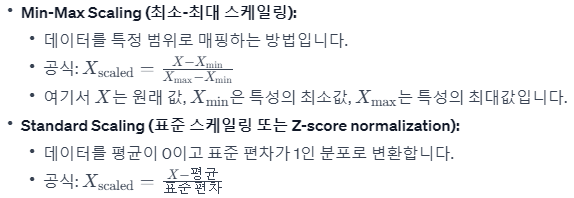

2. 데이터 정규화 (Data Normalization)
- 데이터 정규화는 데이터의 분포를 변환하여 특정 형태로 만드는 프로세스입니다.

- 주로 사용되는 정규화 기법으로는 Min-Max Normalization과 Z-score Normalization이 있습니다.
> 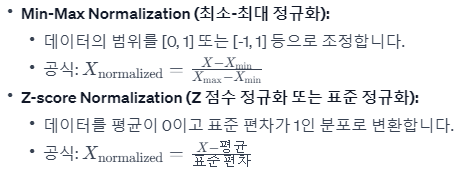

- 이러한 스케일링과 정규화는 모델이 특성 간의 관계를 더 잘 파악하도록 도와주며, 모델의 성능을 안정화시키고 수렴 속도를 향상시킵니다.
- 선택할 스케일링 또는 정규화 방법은 데이터의 특성 및 모델의 요구에 따라 다를 수 있습니다.

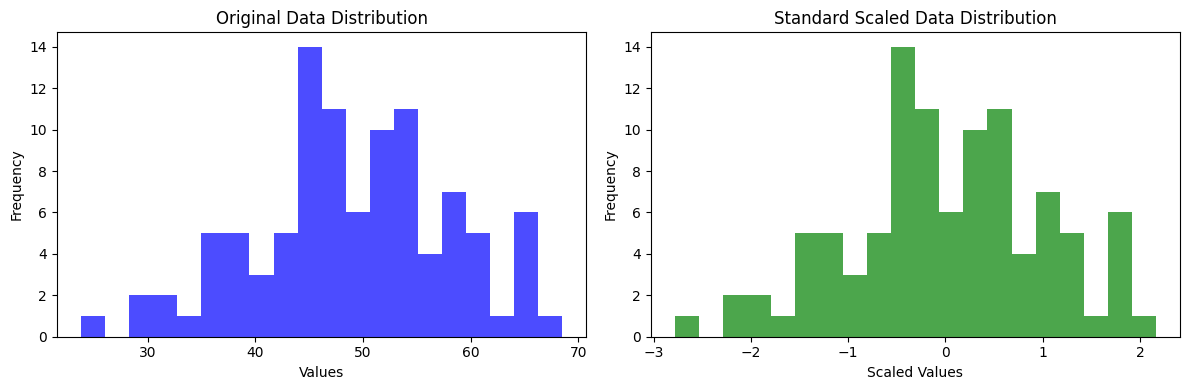

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 예시 데이터 생성 (평균: 50, 표준 편차: 10)
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=100)

# 데이터 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(data, bins=20, color='blue', alpha=0.7)
plt.title('Original Data Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Standard Scaling 적용
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.reshape(-1, 1)).flatten()

# 스케일링 된 데이터 시각화
plt.subplot(1, 2, 2)
plt.hist(scaled_data, bins=20, color='green', alpha=0.7)
plt.title('Standard Scaled Data Distribution')
plt.xlabel('Scaled Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

                            ######result######
# 원래 데이터의 평균과 표준 편차를 유지하면서도 데이터의 범위가 표준화되었음

> Standard Scaling을 적용하면 데이터의 왜곡이 감소하고, 평균이 0으로 표준 편차가 1로 조정되면서 **더 정규화된 분포를 얻을 수 있습니다.**

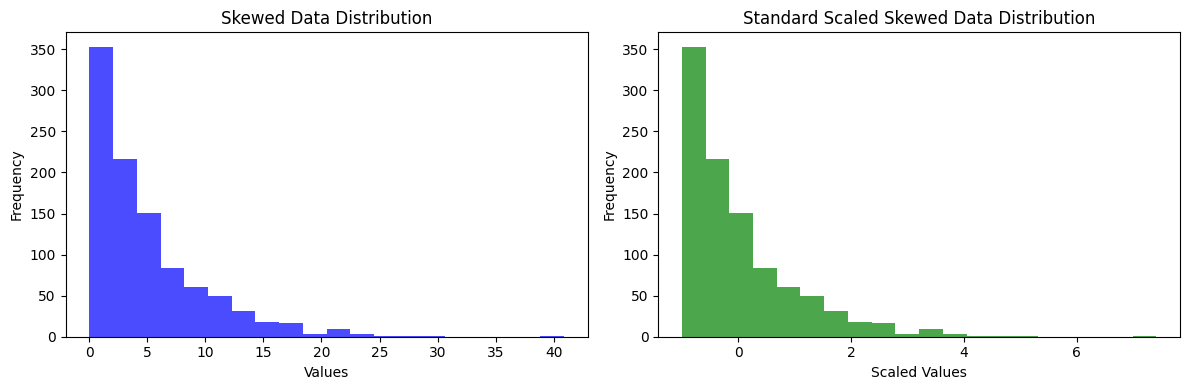

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 왜곡된 예시 데이터 생성
np.random.seed(42)
skewed_data = np.random.exponential(scale=5, size=1000)

# 데이터 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(skewed_data, bins=20, color='blue', alpha=0.7)
plt.title('Skewed Data Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Standard Scaling 적용
scaler = StandardScaler()
scaled_skewed_data = scaler.fit_transform(skewed_data.reshape(-1, 1)).flatten()

# 스케일링 된 데이터 시각화
plt.subplot(1, 2, 2)
plt.hist(scaled_skewed_data, bins=20, color='green', alpha=0.7)
plt.title('Standard Scaled Skewed Data Distribution')
plt.xlabel('Scaled Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

 - Standard Scaling을 적용하면 데이터의 평균이 0이 되고, 표준 편차가 1로 조정됩니다.
 - 이로 인해 데이터의 범위가 줄어들게 되며, 전반적으로 더 정규분포에 가까운 형태로 변화합니다.
 - 폭이 줄어들고 중심이 0으로 이동하면서 데이터의 분포가 더 표준화되고 정규화된 형태로 변하는 것을 확인할 수 있습니다.
 - 이는 모델이 특성 간의 크기 차이에 영향을 덜 받고 안정적으로 학습할 수 있도록 돕습니다.

> 이러한 scaling / standardization 을 선행한다고 해서 무조건 예측 성능이 향상되는 것은 아니다. 따라서, **일반적으로는 중요 feature들이나 target값의 분포도가 심하게 왜곡됐을 경우에 이런 작업을 수행한다.**

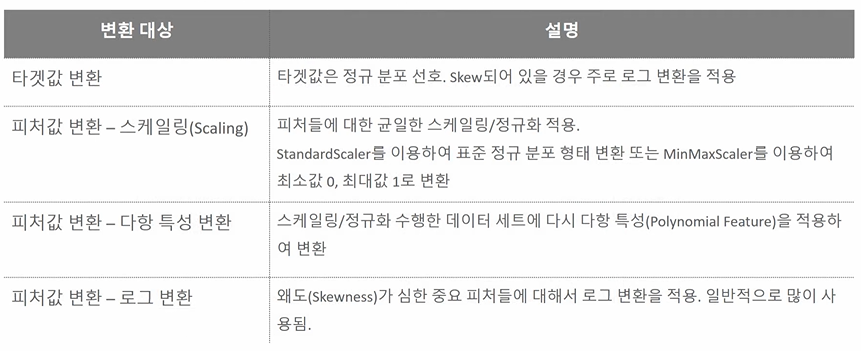

> **"피처값 변환 - 로그변환" 부가적인 설명**

- 로그변환은 매우 유용한 변환이며, 원래 값에 log 함수를 적용하면 보다 정규분포에 가까운 형태로 값이 분포된다.

- 실제로 스케일링, 다항 특성 변환 방법보다 로그변환이 훨씬 많이 사용되는 변환 방법이다. 왜냐하면 스케일링 방법의 경우 예측 성능 향상을 크게 기대하기 어려운 경우가 많으며, 다항 특성 변환 방법의 경우 피처의 개수가 매우 많을 경우에는 다항 변환으로 생성되는 피처의 개수가 기하급수로 늘어나서 과적합의 이슈가 발생할 수 있기 때문이다.



In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
bostonDF = pd.read_csv('/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/boston_house_price.csv')
bostonDF.drop(columns='CAT.MEDV', inplace = True)
bostonDF.rename(columns={'MEDV': 'PRICE'}, inplace=True)
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MinMaxScaler, PolynomialFeatures

# method는 표준 정규 분포 변환(Standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다향식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음.

def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree,
                                         include_bias=False).fit_transform(scaled_data)

    return scaled_data

> **np.log1p**

- 일반적으로 log() 함수를 적용하면 언더 플로우가 발생하기 쉬워서 1+log() 함수를 적용하는데 이를 구현한 것이 np.log1p()
- 내부적으로는 x에 1을 더하고, 그 후에 자연로그를 취합니다.



> **underflow**
- 언더플로우(underflow)는 컴퓨터에서 표현 가능한 최소 부동소수점 수보다 더 작은 수를 표현하려고 할 때 발생하는 문제입니다. 부동소수점은 컴퓨터에서 실수를 표현하는 방식 중 하나로, 유효 숫자 부분과 지수 부분으로 나누어져 있습니다.
- 언더플로우는 주로 작은 확률 값 또는 확률 밀도 함수의 값과 같이 매우 작은 수에 로그를 취할 때 발생합니다.** 로그를 취하면 0에 가까운 수는 음의 무한대로 수렴하게 되는데, 컴퓨터에서는 무한대를 표현할 수 없기 때문에 이 값은 'inf'로 표시됩니다. 이로 인해 수치적인 계산에서 문제가 발생할 수 있습니다.**

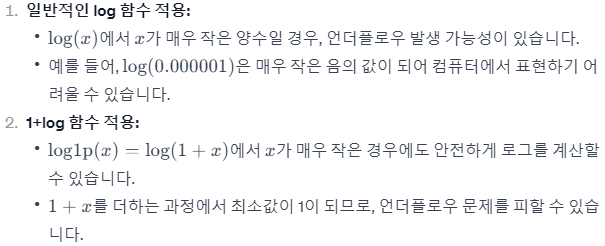

- 따라서 np.log1p() 함수는 작은 수에 대한 로그 계산을 안전하게 수행하기 위해 설계되었습니다. 특히 확률 값이나 확률 밀도 함수 등에서 자주 사용되며, 언더플로우로 인한 수치 안정성을 높일 수 있습니다.

In [20]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None,
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n,
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출

        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff
    print('\n')
    return coeff_df

In [21]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환방법에 따른 RMSE 추출.
alphas = [0.1, 1, 10, 100]
#변환 방법은 모두 6개, 원본 그대로, 표준정규분포, 표준정규분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환
scale_methods=[(None, None), ('Standard', None), ('Standard', 2), ('MinMax', None), ('MinMax', 2), ('Log', None)]

i = 0
for scale_method in scale_methods:
    i += 1
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1],
                                    input_data=X_data)
    print(X_data_scaled.shape, X_data.shape, end = '')
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, y_target_n=y_target, verbose=False, return_coeff=False)

(506, 13) (506, 13)
## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.788 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.653 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.518 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.330 


(506, 13) (506, 13)
## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.826 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.803 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.637 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.421 


(506, 104) (506, 13)
## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 8.827 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 6.871 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.485 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 4.634 


(506, 13) (506, 13)
## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.764 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.465 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.754 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 7.635 


(506, 104) (506, 13)
## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.298 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 4.323 
alpha 10일 때 5 폴드 세트의 평균 

=> **결과 해석**

- min / max scaling으로 feature data set을 변경해도 성능상의 개선은 없다.
- 다항식 변환은 피처의 개수가 많을 경우 적용하기 힘들고 과적합의 이슈가 발생할 수 있다.

- 로그변환으로 피처 데이터 세트를 변경했을 때 alpha가 0.1, 1, 10인 경우에 모두 좋은 성능 향상이 있다.

>- (None, None) : 아무런 변환을 하지 않은 원본 데이터
- ('Standard', None) : 표준정규분포
- ('Standard', 2) : 표준정규분포를 다시 2차 다항식 변환
- ('MinMax', None) : 최소값/최대값 정규화
- ('MinMax', 2) : 최소값/최대값 정규화를 다시 2차 다항식 변환
- ('Log', None) : 로그변환

> ### **다항식 특성 변환 정규화에 대하여**

=> 전체 data를 설명하는 feature의 차수가 높아져서 더 작은 계수로도 기존 data를 설명 가능

=> 모델이 다항식 형태의 데이터에 더 적응하기 쉬워질 수 있다.

1. Feature의 차원 확장:

- 다항식 변환은 주어진 특성(feature)을 고차 다항식으로 확장합니다. 이는 원래 특성에 대한 다양한 차수의 항을 추가함으로써, 높은 차원의 공간에서 데이터를 더 잘 표현할 수 있게 해줍니다.
- 예를 들어, 1차원 데이터를 2차 다항식으로 변환하면 X, X^2의 두 개의 특성이 추가됩니다.

2. 모델의 더 복잡한 패턴 학습:

- 고차 다항식을 사용하면 모델은 더 복잡한 패턴을 학습할 수 있습니다. 이는 주어진 데이터에 대한 적합성을 높일 수 있습니다.
- 예를 들어, 선형 모델로는 설명하기 어려운 비선형 관계를 다항식 모델이 더 잘 표현할 수 있습니다.

3. 정규화를 통한 모델 복잡도 제어:

- 다항식 변환 후에 정규화를 수행하면, 모델이 훈련 데이터에 지나치게 적합되는 것을 방지하고 일반화 성능을 향상시킬 수 있습니다.
- 정규화는 고차 다항식에서 발생하는 과적합(overfitting)을 제어하는 데 도움이 되며, 작은 계수로도 모델이 데이터를 잘 설명하도록 돕습니다.

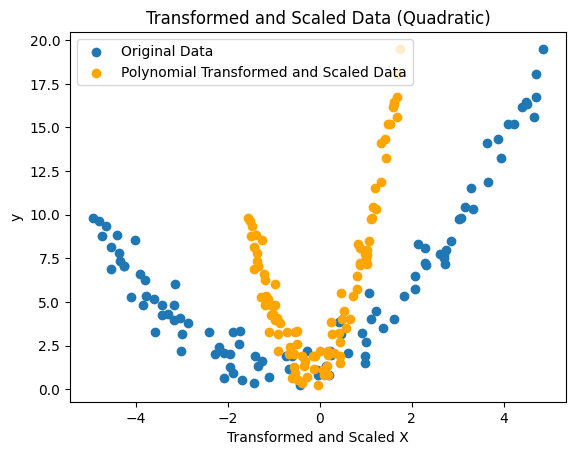

In [22]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import matplotlib.pyplot as plt

# 예시 데이터 생성
np.random.seed(42)
X = np.random.rand(100, 1) * 10 - 5  # -5에서 5 사이의 난수 생성
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)  # 2차 다항식으로 생성된 데이터에 잡음 추가

# 시각화를 위한 원본 데이터 플롯
plt.scatter(X, y, label='Original Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Original Data (Quadratic)')

# 2차 다항식으로 변환
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# 정규화를 위한 StandardScaler 적용
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

# 시각화를 위한 변환된 데이터 플롯
plt.scatter(X_poly_scaled[:, 0], y, label='Polynomial Transformed and Scaled Data', color='orange')
plt.xlabel('Transformed and Scaled X')
plt.ylabel('y')
plt.title('Transformed and Scaled Data (Quadratic)')

plt.legend()
plt.show()


- 다항식 변환은 데이터에 비선형 관계가 존재할 때 유용하며, 선형 모델로는 잘 표현되지 않는 복잡한 패턴을 학습할 수 있게 한다.
- 그러나 주의할 점은 과도한 다항식 차수를 사용하면 모델이 훈련 데이터에 너무 과적합(overfitting)될 수 있다.
- 과적합이 발생하면 훈련 데이터에는 높은 성능을 보이지만, 새로운 데이터에 대한 일반화 성능이 떨어질 수 있습니다.

- 다항식 변환 후의 특성들은 기존 특성들의 조합으로 이루어져 있기 때문에, 이는 모델의 분산을 높일 수 있습니다. 따라서 적절한 다항식 차수를 선택하고, **과적합을 피하기 위해 정규화 기법을 함께 사용하는 것이 중요합니다.**

- **스케일링 (예: Min-Max Scaling, Standardization)은 모델이 데이터의 특성 간에 일관된 척도로 작동하게 만들어주는 반면, 다항식 변환은 모델이 데이터의 비선형 관계를 캡처할 수 있게 도와줍니다.**

> **정리**

- 일반적으로 선형 회귀를 적용하려는 데이터 세트에 데이터 값의 분포가 왜곡(skew)되어 있을 경우에 로그변환을 적용하는 것이 좋은 결과를 기대할 수 있고, 다항 특성 변환 방법은 예측에 대한 분산이 높고(alpha값에 따른 다항 특성 변환을 적용한 결과들을 보면 예측에 대한 분산이 높음), 과적합의 우려가 있어 최근에 많이 쓰이지 않음